## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [7]:
import pandas as pd
# load dataframe from CSV file
# YOUR CODE HERE
data = pd.read_csv("LeMonde2003_9classes.csv.gz")

<Axes: xlabel='count', ylabel='category'>

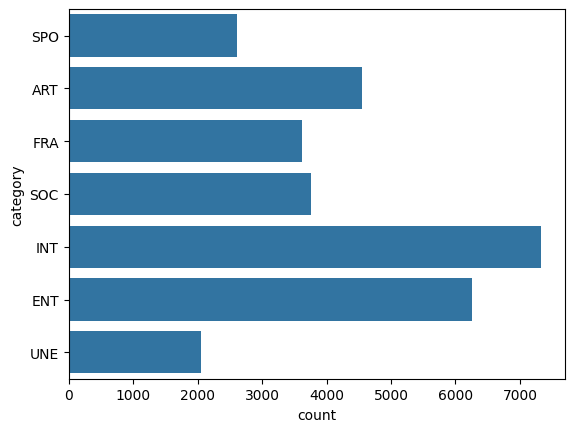

In [8]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE
sns.countplot(data=data,y='category')

In [11]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
data.sample(3, random_state=42)

,text,category
7748,leur cavale a duré moins d'un mois evadées de la maison d'arrêt de luynes bouches-du-rhône le 14 avril le monde du 16 avril trois grandes figures du banditisme marseillais et varois franck perletto eric alboreo et michel valero ont été arrêtées vendredi 9 mai à richerenches dans le vaucluse avec un quatrième homme lui aussi en fuite pascal payet c'est à l'aube vers 6 heures que les policiers de l'office central de répression du banditisme ocrb sont intervenus dans le petit chalet un gîte rural où s'étaient installés la veille les quatre hommes l'interpellation a eu lieu sans heurt les policiers ont découvert sur place plusieurs kalachnikovs et des pistolets 9 mm ainsi qu'une somme d'argent franck perletto 41 ans eric alboreo 39 ans et michel valero 46 ans s'étaient évadés de luynes à bord d'un hélicoptère en vol stationnaire au-dessus de la prison le monde du 16 avril le 31 mars un autre bandit joseph menconi échappé trois semaines avant de la prison de borgo haute-corse avait lui aussi été retrouvé à aubagne bouches-du-rhône le monde du 2 avril l'ocrb ne disposait d'abord d'aucune piste permettant de repérer les trois hommes avant d'avoir vent de leurs possibles allers-retours entre la france et la suisse où ils devaient préparer des braquages informée la police de genève a mis en place une surveillance des lieux de passage et a ainsi détecté leur trace en début de semaine dans un bar du centre-ville jeudi 8 mai les policiers ont repéré une voiture conduite par michel valero avec un autre passager à bord identifié plus tard comme étant pascal payet grand banditisme varois a la frontière française l'ocrb a pris le relais de la filature arrivés à richerenches dans la soirée les policiers ont décidé d'intervenir à l'aube sans savoir précisément qui se trouvait dans le chalet un indice toutefois avait suscité leur attention une voiture immatriculée dans le var garée à côté de la passat suivie depuis plusieurs heures l'indice s'est révélé concluant eric alboreo et franck perletto dormaient dans le chalet franck perletto est soupçonné depuis la mort du parrain varois jean-claude fargette de contrôler le grand banditisme du var avec son frère pascal jugé actuellement pour un trafic international de cannabis le monde du 7 mai il devrait le rejoindre lundi devant la cour d'assises spéciale des bouches-du-rhône de leur côté eric alboreo et michel valero avaient été condamnés en décembre 2002 par la cour d'assises à aix-en-provence à vingt ans de réclusion criminelle pour l'attaque d'un fourgon blindé devant la banque de france de salon-de-provence au cours de laquelle un vigile avait été tué eric alboreo avait été arrêté à paris en janvier 1999 en compagnie de pascal payet lui aussi recherché pour l'attaque du fourgon et qui s'était évadé de la même prison de luynes par hélicoptère le 12 octobre 2001 les policiers le soupçonnaient d'être l'instigateur de l'évasion du 14 avril,SOC
4170,décrire la situation en irak comme une catastrophe humanitaire serait franchement prématuré à ce stade même si le potentiel pour une catastrophe est certainement là a déclaré lundi 31 mars à genève le directeur adjoint du bureau de coordination des affaires humanitaires de l'onu ocha ross mountain de son côté l'unicef estime que la situation dans le nord de l'irak est critique et empire rapidement ainsi que l'a déclaré un porte-parole en turquie environ 600 000 personnes provenant de cette région auraient été déplacées depuis le début de la guerre afp,INT
16501,samedi 12 juillet l'afrique du sud avec ici son demi de mêlée joost van der westhuizen a battu l'australie 26-22 dans le 1er match des tri-nations,SPO


In [13]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 37.9 MB/s eta 0:00:00


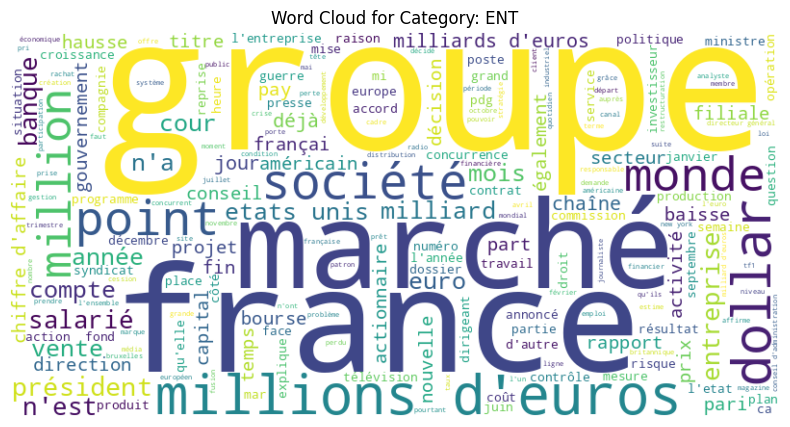

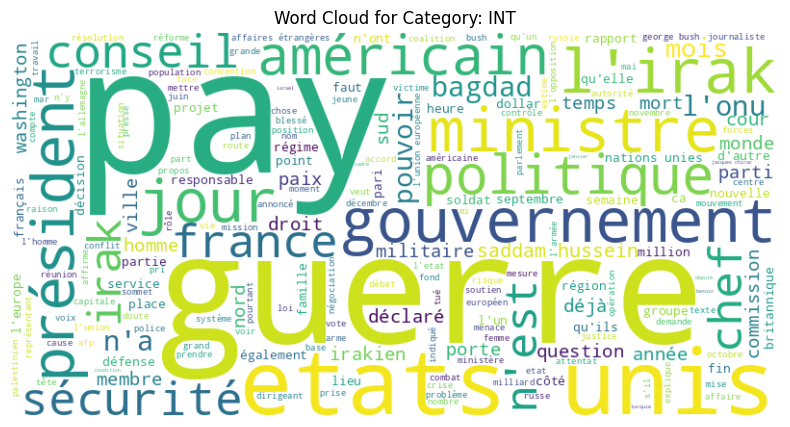

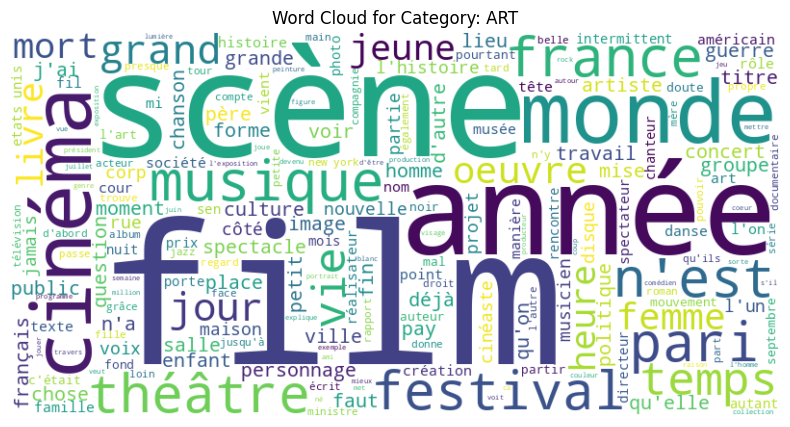

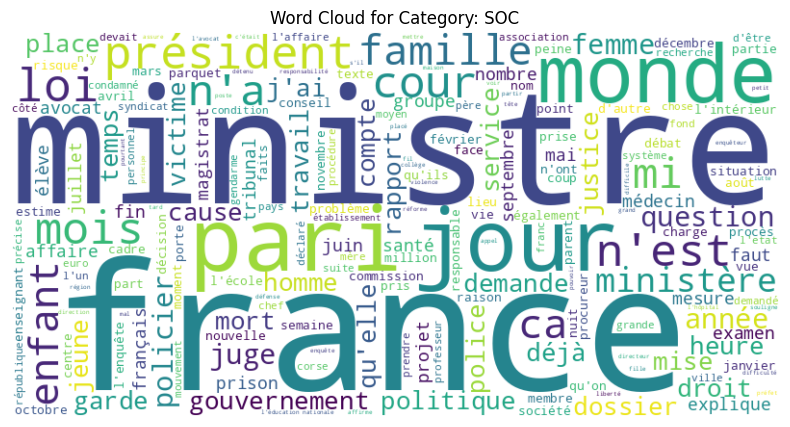

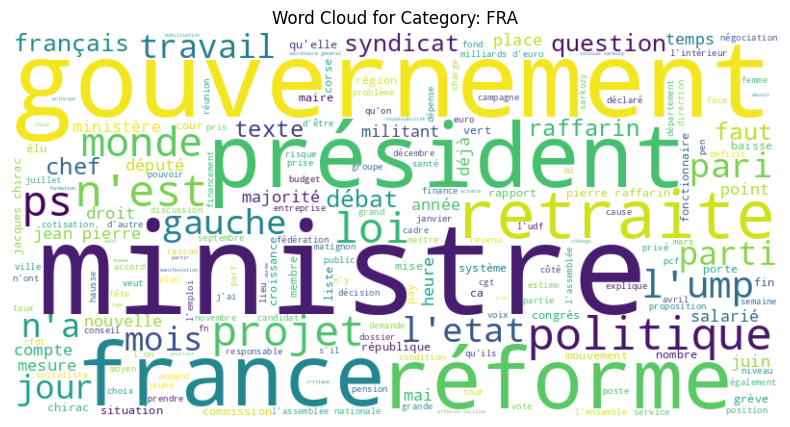

In [18]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
 # YOUR CODE HERE
    cat_text = " ".join(data[data['category'] == cat]['text'].dropna())
    wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate(cat_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Category: {cat}")
    plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [25]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
X = data['text']
y = data['category']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train size:", len(X_train), "articles")
print("Dev set:", len(X_dev), "articles")
print("Test set:", len(X_test), "articles")

Train size: 24132 articles
Dev set: 3016 articles
Test set: 3017 articles


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(stop_words=STOPWORDS, max_features=1000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

/usr/local/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


In [32]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()
# Train 
clf.fit(X_train_counts, y_train)
# Evaluate 
train_score = clf.score(X_train_counts, y_train)
dev_score = clf.score(X_dev_counts, y_dev)
test_score = clf.score(X_test_counts, y_test)

print("Train score:", train_score)
print("Dev score:",   dev_score)
print("Test score:",  test_score)

Train score: 0.7431626056688215
Dev score: 0.7446949602122016
Test score: 0.7341730195558502


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
# YOUR CODE HERE
tf_transformer = TfidfTransformer()

tf_transformer.fit(X_train_counts)

X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train_tf, y_train)

train_acc = accuracy_score(y_train, clf_tfidf.predict(X_train_tf))
dev_acc = accuracy_score(y_dev, clf_tfidf.predict(X_dev_tf))
test_acc = accuracy_score(y_test, clf_tfidf.predict(X_test_tf))

print("Error Rate:", 1 - train_acc)
print("Error Rate:", 1 - dev_acc)
print("Error Rate:", 1 - test_acc)

Error Rate: 0.23321730482347092
Error Rate: 0.22877984084880632
Error Rate: 0.24627113026184955


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


Classification Report (on Test Set):

              precision    recall  f1-score   support

         ART      0.806     0.848     0.827       455
         ENT      0.790     0.854     0.821       625
         FRA      0.648     0.727     0.685       362
         INT      0.763     0.846     0.802       733
         SOC      0.645     0.702     0.673       376
         SPO      0.912     0.789     0.846       261
         UNE      0.125     0.005     0.009       205

    accuracy                          0.754      3017
   macro avg      0.670     0.682     0.666      3017
weighted avg      0.716     0.754     0.729      3017



<Figure size 1000x800 with 0 Axes>

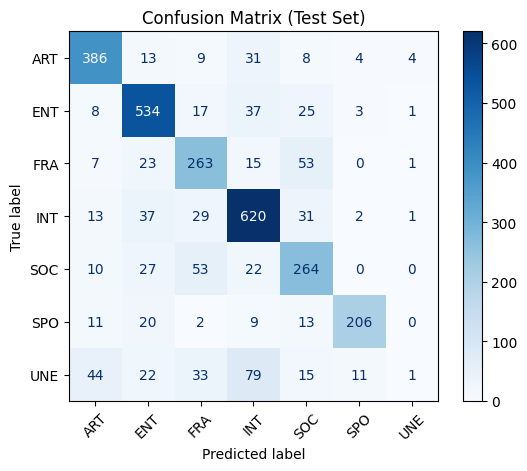

In [38]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# YOUR CODE HERE
y_pred_test = clf_tfidf.predict(X_test_tf)

print("Classification Report (on Test Set):\n")
print(classification_report(y_test, y_pred_test, digits=3))

cm = confusion_matrix(y_test, y_pred_test, labels=clf_tfidf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_tfidf.classes_)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title("Confusion Matrix (Test Set)")
plt.show()


SPO and ART and ENT have the best score. Probably because these topics use domain specific language like "match", "joueur", "équipe" or "championnat" for sports and these words can hardly correspond to any other field.

UNE is the most confused because it does not correspond to a specific article topic.

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

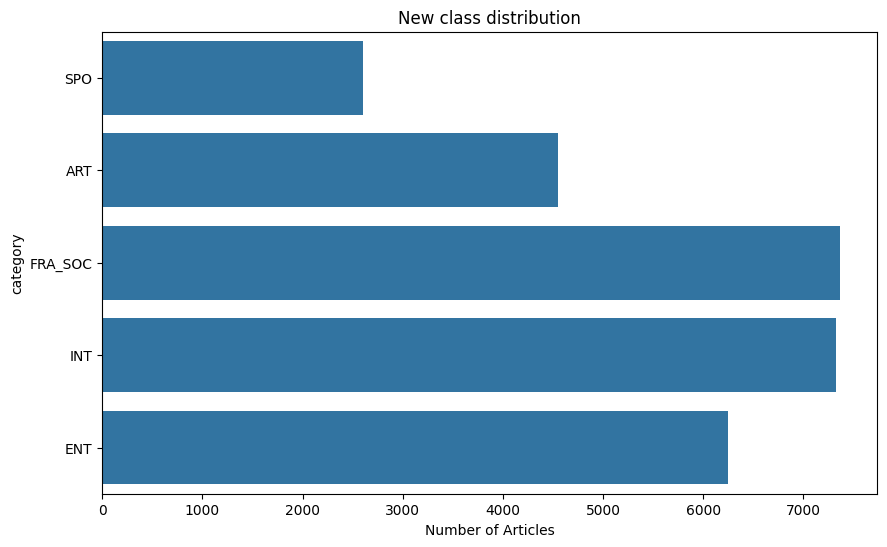

Train size: 22488 Dev size: 2811 Test size: 2811
Train Accuracy: 0.8380024902170046
Dev Accuracy: 0.8306652436855212
Test Accuracy: 0.8431163287086446


<Figure size 1000x800 with 0 Axes>

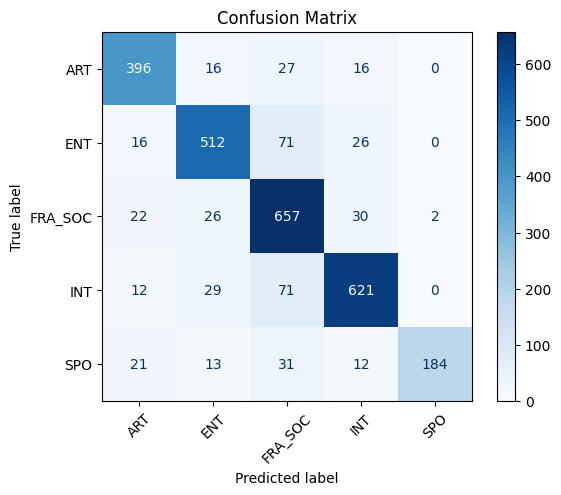

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
data_reconfig = data[data['category'] != 'UNE'].copy()
data_reconfig['category'] = data_reconfig['category'].replace({'FRA': 'FRA_SOC', 'SOC': 'FRA_SOC'})

# Plot the statistics of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=data_reconfig, y='category')
plt.title("New class distribution")
plt.xlabel("Number of Articles")
plt.show()

# Make the splits and print the sizes for checking
X = data_reconfig['text']
y = data_reconfig['category']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Train size:", len(X_train), "Dev size:", len(X_dev), "Test size:", len(X_test))

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(X_train)

X_train_tf = vectorizer.transform(X_train)
X_dev_tf = vectorizer.transform(X_dev)
X_test_tf = vectorizer.transform(X_test)

# Train MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Print accuracy
train_acc = accuracy_score(y_train, clf.predict(X_train_tf))
dev_acc = accuracy_score(y_dev, clf.predict(X_dev_tf))
test_acc = accuracy_score(y_test, clf.predict(X_test_tf))

print("Train Accuracy:", train_acc)
print("Dev Accuracy:", dev_acc)
print("Test Accuracy:", test_acc)

# Print confusion matrix
y_pred_test = clf.predict(X_test_tf)

cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.